<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/fits/Week_6_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2022**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Interpolation

Fitting is great for smoothing out statistical errors and data reduction, but finding the parameters can be rough.  A different approach is just to play connect-the-dots with your data points.  We call this method **interpolation**.

Two important notes about using *interp1d*:
* The default method is linear.  Often 'cubic' is the best choice.
* You cannot go outside the bounds of your data unless you pass fill_value='extrapolate'


**References:**
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

## Warm-Up
Given two data points $(0, 10.5)$ and $(10,4)$, estimate the value at $x=5$.

In [2]:
# Class example - linear interpolation by hand
x1 = 0
y1 = 10.5
x2 = 10
y2 = 4

m = (y2-y1)/(x2-x1)
x = 5
y = m*(x-x1) + y1
print(y)

7.25


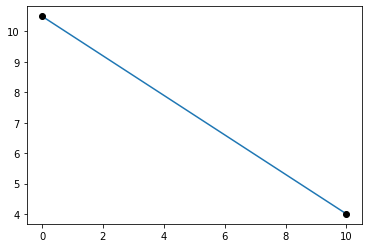

In [3]:
# Do lots of values of x to check
x = np.linspace(x1,x2)
y = m*(x-x1) + y1

plt.plot(x,y)
plt.plot([x1,x2], [y1,y2], 'ko')
plt.show()

# interp1d
The *interp1d* command takes data points and returns a **function** which gives y value(s) for any x value(s).  Easy!

In [4]:
f = interp1d([x1,x2], [y1,y2])
f(5)

array(7.25)

In [5]:
f(x)

array([10.5       , 10.36734694, 10.23469388, 10.10204082,  9.96938776,
        9.83673469,  9.70408163,  9.57142857,  9.43877551,  9.30612245,
        9.17346939,  9.04081633,  8.90816327,  8.7755102 ,  8.64285714,
        8.51020408,  8.37755102,  8.24489796,  8.1122449 ,  7.97959184,
        7.84693878,  7.71428571,  7.58163265,  7.44897959,  7.31632653,
        7.18367347,  7.05102041,  6.91836735,  6.78571429,  6.65306122,
        6.52040816,  6.3877551 ,  6.25510204,  6.12244898,  5.98979592,
        5.85714286,  5.7244898 ,  5.59183673,  5.45918367,  5.32653061,
        5.19387755,  5.06122449,  4.92857143,  4.79591837,  4.66326531,
        4.53061224,  4.39795918,  4.26530612,  4.13265306,  4.        ])

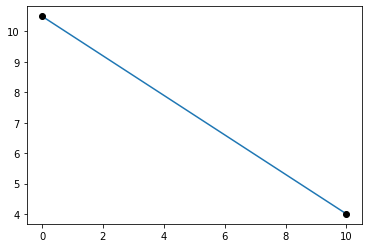

In [6]:
plt.plot(x, f(x))
plt.plot([x1,x2], [y1,y2], 'ko')
plt.show()

# Interp Options



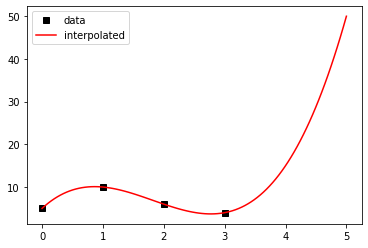

In [7]:
xdata = np.array([0, 1, 2, 3])  # made up data
ydata = np.array([5, 10, 6, 4])

xint = np.linspace(0,5,100)
fint = interp1d(xdata, ydata, kind='cubic', fill_value='extrapolate')
yint = fint(xint)

plt.plot(xdata, ydata,'ks', label='data')
plt.plot(xint, yint, '-r', label='interpolated', )

plt.legend()
plt.show()

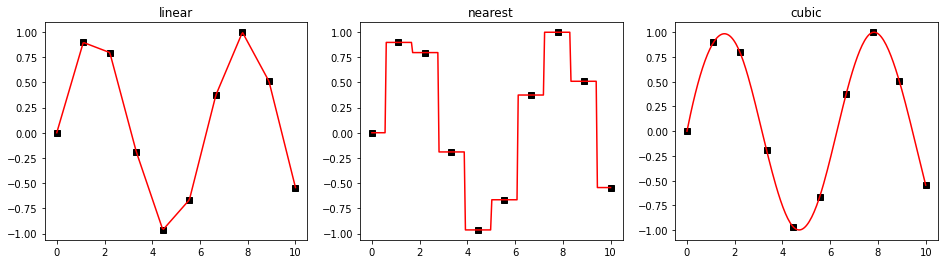

In [8]:
x = np.linspace(0,10, num=10)
y = np.sin(x)
plt.figure(figsize=(16,4))

kinds = ['linear', 'nearest','cubic']
for i,k in enumerate(kinds):
  f = interp1d(x, y,kind=k)
  xfit = np.linspace(0,10,num=200)
  yfit = f(xfit)
  plt.subplot(1,3,i+1)
  plt.plot(x,y,'ks')
  plt.plot(xfit,yfit,'r-',label=k)
  plt.title(k)

# Example: Weather Problem
Given the weather forecast for times and temperatures:

|Time (PM)|Temp (F)|
|---|---|
|1:00|83|
|2:00|84|
|3:00|85|
|4:00|86|
|5:00|86|
|6:00|85|
|7:00|82|

Use interpolation to estimate the temperature at any time



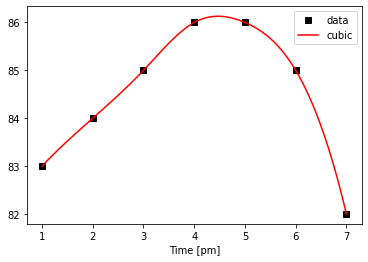

In [9]:
xdata = np.arange(1,8)
ydata = np.array([83,84,85,86,86,85,82])

xint = np.linspace(1,7,100)

fint = interp1d(xdata, ydata, kind='cubic', fill_value='extrapolate')
yint = fint(xint)

plt.plot(xdata, ydata,'ks', label='data')
plt.plot(xint, yint, '-r', label='cubic', )

plt.xlabel('Time [pm]')
plt.legend()
plt.show()

In [10]:
print('The temp at 3:30 PM is',fint(3.5))

The temp at 3:30 PM is 85.56696428571428


# DEVIOUS TRICK

root finding with interp????

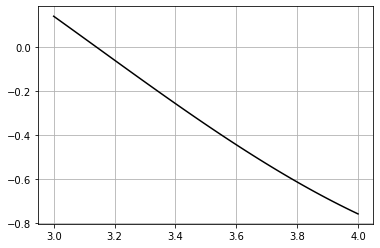

In [15]:
# sin(x) has a root at x=pi
xdata = np.linspace(3,4)  
ydata = np.sin(xdata)  
plt.plot(xdata, ydata,'-k', label='data')
plt.grid()
plt.show()

In [16]:
fint = interp1d(xdata, ydata, kind='cubic', fill_value="extrapolate")
fint(3.1415)

array(9.26535884e-05)

In [17]:
# quick-and-dirty root finding:  flip x and y, interp to find x where y=0
fint = interp1d(ydata, xdata, kind='cubic', fill_value="extrapolate")
fint(0)    

array(3.14159265)